In [ ]:
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, Input
from keras.optimizers import Adam
from keras.losses import BinaryFocalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
"""
# generate 2d classification dataset
pX, py = make_blobs(n_samples=50, center_box=[0,10], cluster_std=3, centers=[[9,0]], n_features=2)
py[:] = 1
nX, ny = make_blobs(n_samples=50, center_box=[0,10], cluster_std=3, centers=[[0,9]], n_features=2)
u_X, u_y = make_blobs(n_samples=100, center_box=[0,10], cluster_std=3, centers=[[0,9], [9,0]], n_features=2)
uX = np.append(u_X, nX, axis=0)
uy = np.append(u_y, ny)
before_uy = uy.copy()
uy[:]=2
X = np.append(pX[:,0], uX[:,0])
y = np.append(pX[:,1], uX[:,1])
label = np.append(py,uy)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X, y=y, label=label))
colors = {0:'red', 1:'blue', 2:'gray'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
"""

"\n# generate 2d classification dataset\npX, py = make_blobs(n_samples=50, center_box=[0,10], cluster_std=3, centers=[[9,0]], n_features=2)\npy[:] = 1\nnX, ny = make_blobs(n_samples=50, center_box=[0,10], cluster_std=3, centers=[[0,9]], n_features=2)\nu_X, u_y = make_blobs(n_samples=100, center_box=[0,10], cluster_std=3, centers=[[0,9], [9,0]], n_features=2)\nuX = np.append(u_X, nX, axis=0)\nuy = np.append(u_y, ny)\nbefore_uy = uy.copy()\nuy[:]=2\nX = np.append(pX[:,0], uX[:,0])\ny = np.append(pX[:,1], uX[:,1])\nlabel = np.append(py,uy)\n# scatter plot, dots colored by class value\ndf = DataFrame(dict(x=X, y=y, label=label))\ncolors = {0:'red', 1:'blue', 2:'gray'}\nfig, ax = plt.subplots()\ngrouped = df.groupby('label')\nfor key, group in grouped:\n    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])\nplt.show()\n"

In [ ]:
X = pd.read_csv("fault.txt", sep='\t')
tempy = pd.read_csv("faultlabel.txt", sep='\t')
X = X.to_numpy()
tempy = tempy.to_numpy()
y = list(map(np.argmax, tempy))
nX = []
ny = []
pX = []
py = []
for i, x in enumerate(y):
  if(x == 0):
    nX.append(X[i])
    ny.append(y[i])
  else:
    pX.append(X[i])
    py.append(y[i])
nl = int(0.75 * len(pX))
u_X = pX[:nl]
u_y = py[:nl]
pX = pX[nl:]
py = py[nl:]
uX = np.append(u_X, nX, axis=0)
uy = np.append(u_y, ny, axis=0)
before_uy = uy.copy()
uy[:] = 2
totalX = np.append(uX, pX, axis=0)
totaly = np.append(before_uy, py, axis=0)

In [ ]:
unpX = pX.copy()
unuX = uX.copy()
pX = normalize(pX, axis=0)
uX = normalize(uX, axis=0)
uy = uy.astype(np.float32)
pX, py = shuffle(pX, py)
repeat = True
reps=5
while repeat or reps>0:
  uX, uy, before_uy = shuffle(uX, uy, before_uy)
  sl = len(pX)
  bagX = uX[:sl]
  bagy = uy[:sl]
  unbagX = uX[sl:]
  unbagy = uy[sl:]
  X = np.append(pX, bagX, axis=0)
  y = np.append(py, np.zeros_like(bagy), axis=0)
  X, y = shuffle(X, y)

  model = Sequential()
  model.add(Dense(20, input_shape=(9,)))
  model.add(Dense(50, activation='tanh'))
  model.add(Dense(50, activation='tanh'))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = Adam(learning_rate=0.05)
  model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
  history = model.fit(X, y, epochs=20, verbose=0)
  outputs = model.predict(unbagX, verbose=0)
  repeat = False
  reps-=1
  for i, x in enumerate(unbagy):
    if(x==2):
      repeat = True
      unbagy[i] = float(outputs[i])
    else:
      unbagy[i] = float((x+outputs[i])/2.0)
  if(repeat):
    reps+=1
  print(repeat, reps, np.average(uy))

True 5 0.28575417
True 5 0.038847428
True 5 0.005005789
True 5 0.0011139992
True 5 0.00035868897
False 4 0.00038379585
False 3 0.00031802405
False 2 0.00035902768
False 1 0.0001801922
False 0 0.00030213987


0.00030213987 8.2486326e-07


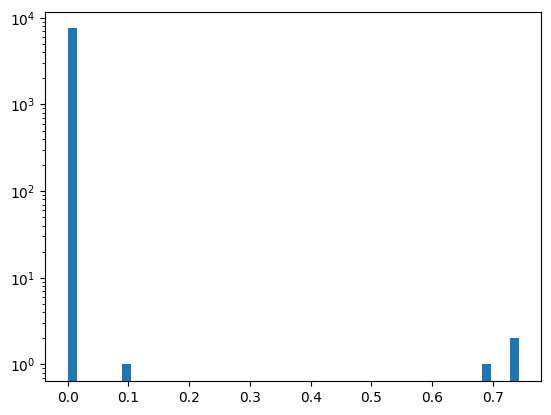

In [ ]:
from keras.activations import sigmoid
print(np.average(uy), np.median(uy))
plt.hist(uy, 50)
plt.yscale("log")
#plt.vlines(np.average(uy), 0, 10000, color='red')
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(20, input_shape=(9,)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.05)
model.compile(loss="mse", optimizer=optimizer, metrics=['accuracy'])
history = model.fit(uX, np.around(uy), epochs=10, verbose=1)
score = model.evaluate(totalX, totaly)
print(score)

Epoch 1/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 2/10
235/235 [==============================] - 0s 2ms/step - loss: 3.9940e-04 - accuracy: 0.9996
Epoch 3/10
235/235 [==============================] - 0s 2ms/step - loss: 3.9928e-04 - accuracy: 0.9996
Epoch 4/10
235/235 [==============================] - 0s 2ms/step - loss: 3.9919e-04 - accuracy: 0.9996
Epoch 5/10
235/235 [==============================] - 0s 2ms/step - loss: 3.9914e-04 - accuracy: 0.9996
Epoch 6/10
235/235 [==============================] - 0s 2ms/step - loss: 3.9910e-04 - accuracy: 0.9996
Epoch 7/10
235/235 [==============================] - 0s 2ms/step - loss: 3.9908e-04 - accuracy: 0.9996
Epoch 8/10
235/235 [==============================] - 0s 2ms/step - loss: 3.9906e-04 - accuracy: 0.9996
Epoch 9/10
235/235 [==============================] - 0s 2ms/step - loss: 3.9904e-04 - accuracy: 0.9996
Epoch 10/10
269/269 [==============================] - 1s 1ms/step -

269/269 [==============================] - 0s 1ms/step


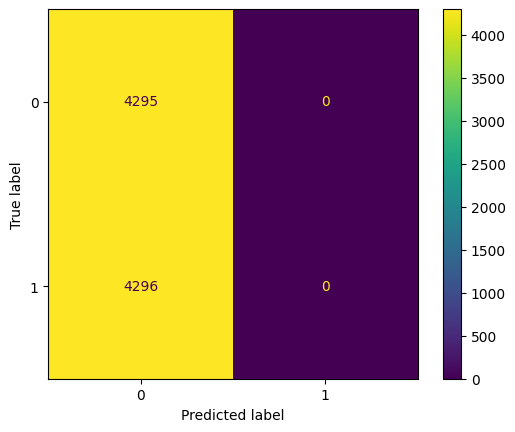

In [ ]:
pred = model.predict(totalX)
prediction = np.around(pred)
cm = confusion_matrix(totaly, prediction)
disp = ConfusionMatrixDisplay(cm)
disp.plot()